In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

import keijzer_exogan as ke

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab

# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks') 

In [2]:
df = pd.read_csv('Validation error of 5 images')
df.head()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
0,0,-0.843169,2.227944,-12.657884,23.821317,12.820755,3.764236,10.281347,2.783733e+27,1444.444448,...,-4.093484,-5.884384,-16.629781,2.760262e+27,1476.625860,-16.089012,6.925178e+07,-4.618300,-6.105886,-18.339547
1,0,-8.197566,15.862516,-26.089337,-26.619665,-9.761774,-39.547294,13.652623,3.542933e+27,1444.444448,...,-14.838882,-11.257083,-9.466183,3.252499e+27,1673.569679,-6.996519,7.695139e+07,-13.390344,-6.805211,-10.758566
2,0,77.088640,23.574894,-3.472465,-19.711376,3.752856,-32.684325,-48.399766,1.771467e+27,1333.333343,...,-11.257083,-13.047982,-16.629781,3.137066e+27,1647.665262,-5.680051,7.546445e+07,-11.679545,-8.783337,-8.581006
3,0,-18.513776,14.037846,5.905897,-24.439571,84.941030,-17.120285,-33.916581,3.796000e+27,1444.444448,...,-2.302585,-14.838882,-14.838882,3.093217e+27,1647.213340,-8.128578,7.512896e+07,-4.258424,-12.298423,-9.806040


In [3]:
df.describe()

,Unnamed: 0,planet_mass_error,temp_profile_error,ch4_mixratio_error,planet_radius_error,h2o_mixratio_error,co2_mixratio_error,co_mixratio_error,planet_mass_real,temp_profile_real,...,h2o_mixratio_real,co2_mixratio_real,co_mixratio_real,planet_mass_inpainted,temp_profile_inpainted,ch4_mixratio_inpainted,planet_radius_inpainted,h2o_mixratio_inpainted,co2_mixratio_inpainted,co_mixratio_inpainted
count,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00,4.000000,...,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000
mean,0.0,12.383532,13.925800,-9.078447,-11.737324,22.938217,-21.396917,-14.595594,2.973533e+27,1416.666672,...,-8.123008,-11.257083,-14.391157,3.060761e+27,1611.268535,-9.223540,7.419914e+07,-8.486653,-8.498214,-11.871290
std,0.0,43.741368,8.826254,13.639896,23.880491,42.363818,19.219911,31.266844,9.095156e+26,55.555552,...,5.917200,3.868785,3.390118,2.112969e+26,90.603225,4.685068,3.391993e+06,4.728735,2.775631,4.403322
min,0.0,-18.513776,2.227944,-26.089337,-26.619665,-9.761774,-39.547294,-48.399766,1.771467e+27,1333.333343,...,-14.838882,-14.838882,-16.629781,2.760262e+27,1476.625860,-16.089012,6.925178e+07,-13.390344,-12.298423,-18.339547
25%,0.0,-10.776619,11.085371,-16.015747,-24.984595,0.374199,-34.400068,-37.537377,2.530667e+27,1416.666672,...,-12.152532,-13.495707,-16.629781,3.009978e+27,1604.566470,-10.118687,7.365967e+07,-12.107245,-9.662109,-12.653811
50%,0.0,-4.520368,14.950181,-8.065174,-22.075474,8.286806,-24.902305,-11.817617,3.163333e+27,1444.444448,...,-7.675283,-12.152532,-15.734332,3.115142e+27,1647.439301,-7.562549,7.529670e+07,-8.148922,-7.794274,-10.282303
75%,0.0,18.639783,17.790610,-1.127875,-8.828203,30.850824,-11.899155,11.124166,3.606200e+27,1444.444448,...,-3.645760,-9.913908,-13.495707,3.165924e+27,1654.141366,-6.667402,7.583618e+07,-4.528331,-6.630380,-9.499782
max,0.0,77.088640,23.574894,5.905897,23.821317,84.941030,3.764236,13.652623,3.796000e+27,1444.444448,...,-2.302585,-5.884384,-9.466183,3.252499e+27,1673.569679,-5.680051,7.695139e+07,-4.258424,-6.105886,-8.581006


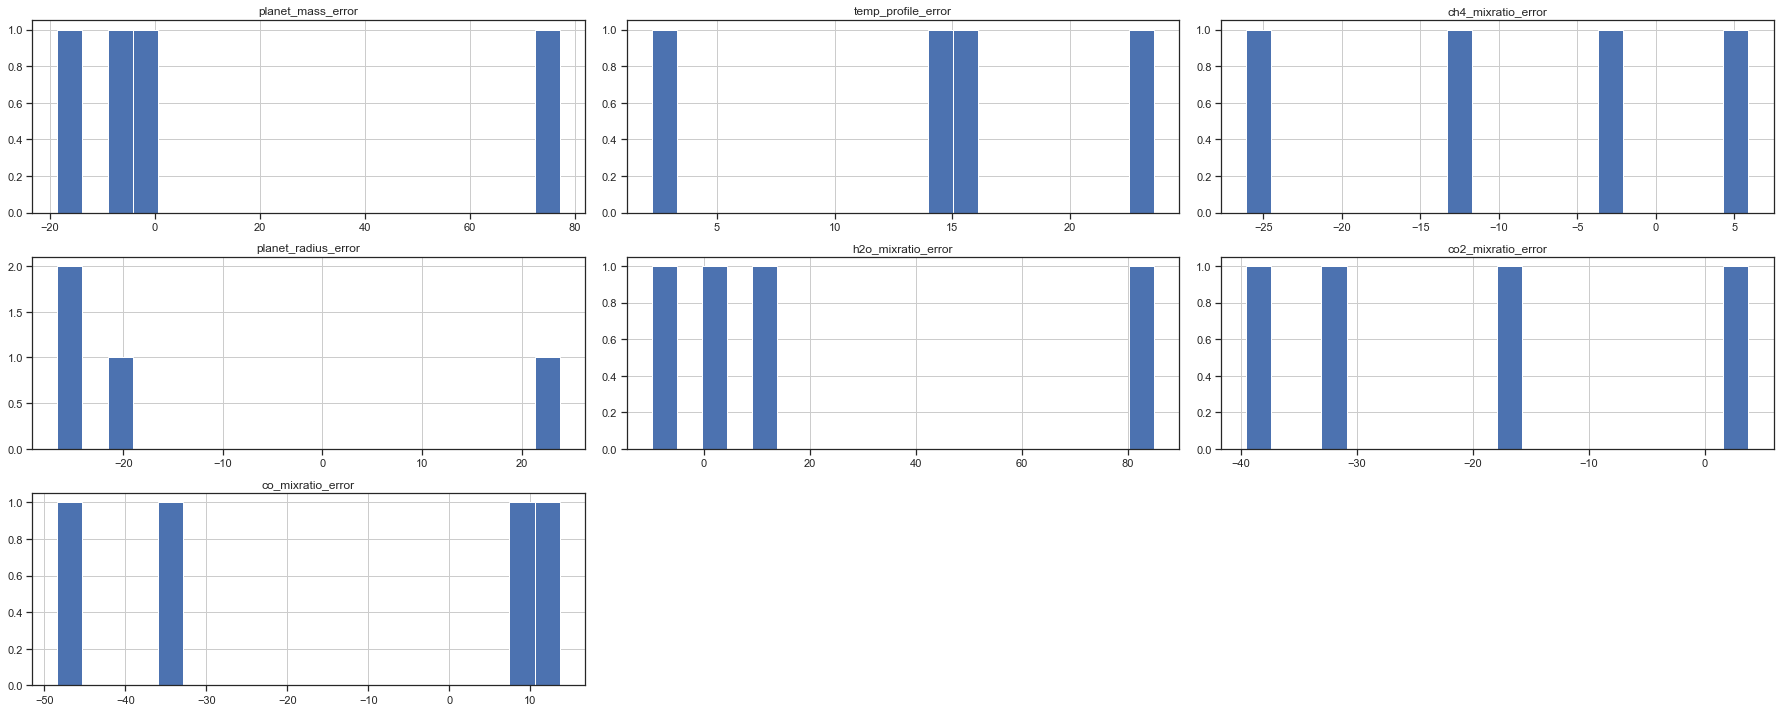

In [4]:
params = ['planet_mass','temp_profile','ch4_mixratio','planet_radius','h2o_mixratio','co2_mixratio','co_mixratio']

plt.figure(figsize=((25,10)))
for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param+'_error')
    plt.hist(df[param+'_error'], bins=20)
    plt.grid()
    plt.tight_layout()

# Grab the $n$ sigma errors

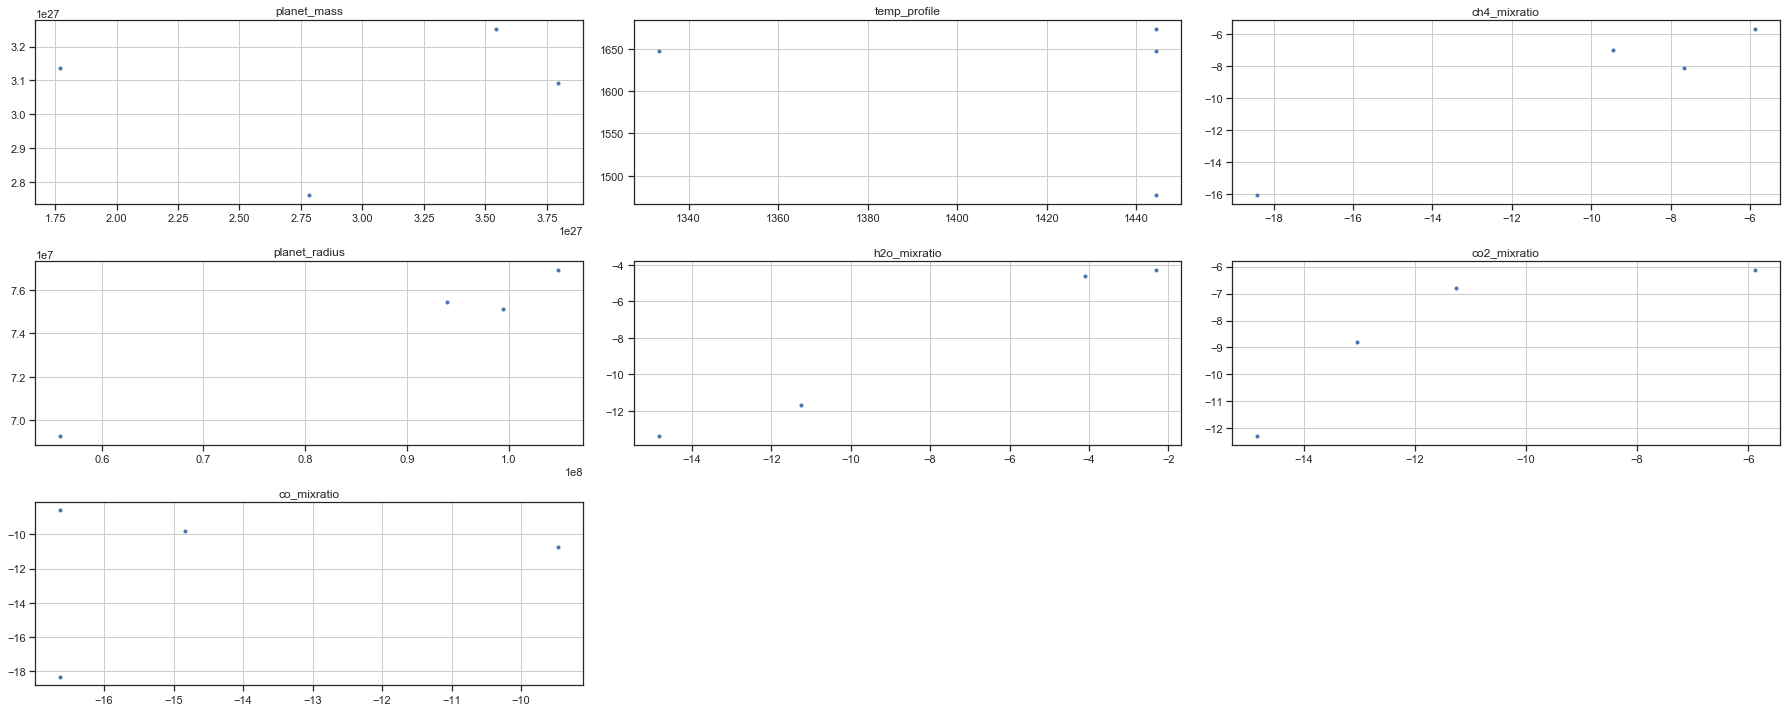

In [5]:
plt.figure(figsize=((25,10)))

for i,param in enumerate(params):
    plt.subplot(3,3,i+1)
    plt.title(param)
    plt.plot(df[param+'_real'], df[param+'_inpainted'], '.')
    plt.grid()
    plt.tight_layout()